In [1]:
import os
import pickle
from pympler import asizeof
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from tensorflow.keras.models import load_model

In [26]:
# NAME, MODEL, SIZE, MEMORY, TIME
classifiers = [
                # ["KNN", None, 0, 0, 0],
                ["NC", None, 0, 0, 0],
                ["XGBoost", None, 0, 0, 0],
                ["Random Forest", None, 0, 0, 0],
                # ["SVM", None, 0, 0, 0],
                ["LTSM", None, 0, 0, 0]
              ]

for i in range(len(classifiers)):   
    if os.path.exists("models/"+ classifiers[i][0] + '.pkl'):
        with open("models/"+ classifiers[i][0] + '.pkl', 'rb') as file:
            classifiers[i][1] = pickle.load(file)
            classifiers[i][2] = os.path.getsize("models/"+ classifiers[i][0] + '.pkl')

            
    elif os.path.exists("models/"+ classifiers[i][0] + '.json'):
        classifiers[i][1] = XGBClassifier()
        classifiers[i][1].load_model("models/"+ classifiers[i][0] + '.json')

        classifiers[i][2] = os.path.getsize("models/"+ classifiers[i][0] + '.json')

    elif os.path.exists("models/"+ classifiers[i][0] + '.keras'):
        classifiers[i][1] = load_model("models/"+ classifiers[i][0] + '.keras')

        classifiers[i][2] = os.path.getsize("models/"+ classifiers[i][0] + '.keras')
    else:
        print(f"Não carregou com sucesso o modelo: {classifiers[i][0]}")


for i in range(len(classifiers)):
     classifiers[i][3] = asizeof.asizeof(classifiers[i][1])


In [27]:
N = 1000

X_test = np.load("data/X_test.npy")
X_test_trad = np.load("data/X_test_trad.npy")

X_test = X_test[0:N]
X_test_trad = X_test_trad[0:N]

for i in range(len(classifiers)):
    clf = classifiers[i][1]
    name = classifiers[i][0]

    if name == "LTSM":
        start_time = time.time()
        clf.predict(X_test)
        end_time = time.time()

        classifiers[i][4] = (end_time - start_time)/N
    else:
        start_time = time.time()
        clf.predict(X_test_trad)
        end_time = time.time()

        classifiers[i][4] = (end_time - start_time)/N

    

32/32 [==============================] - 1s 4ms/step


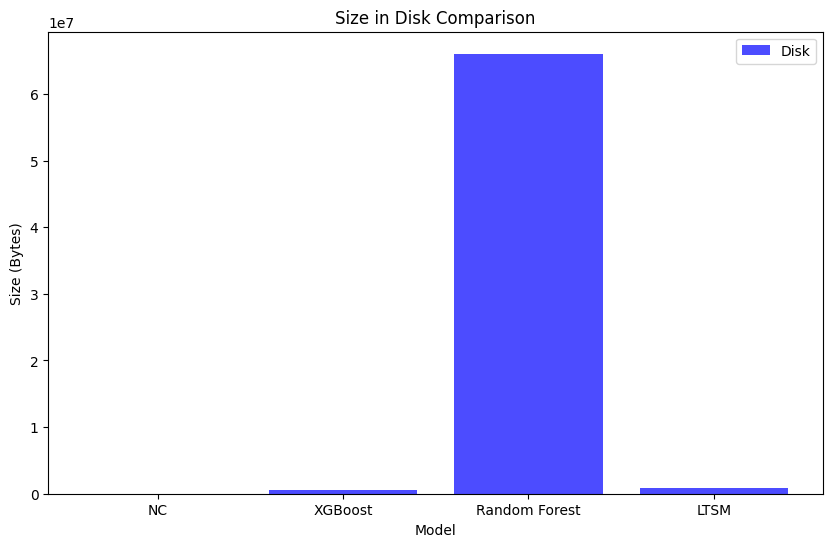

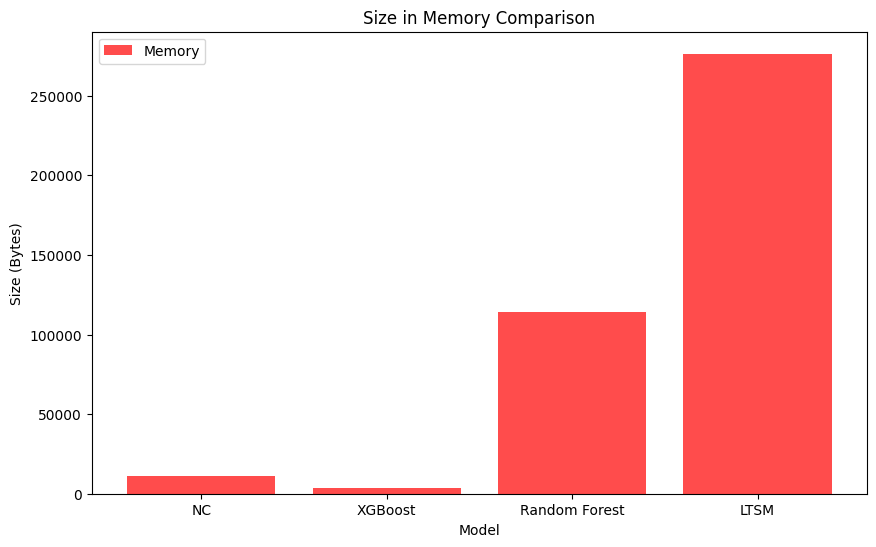

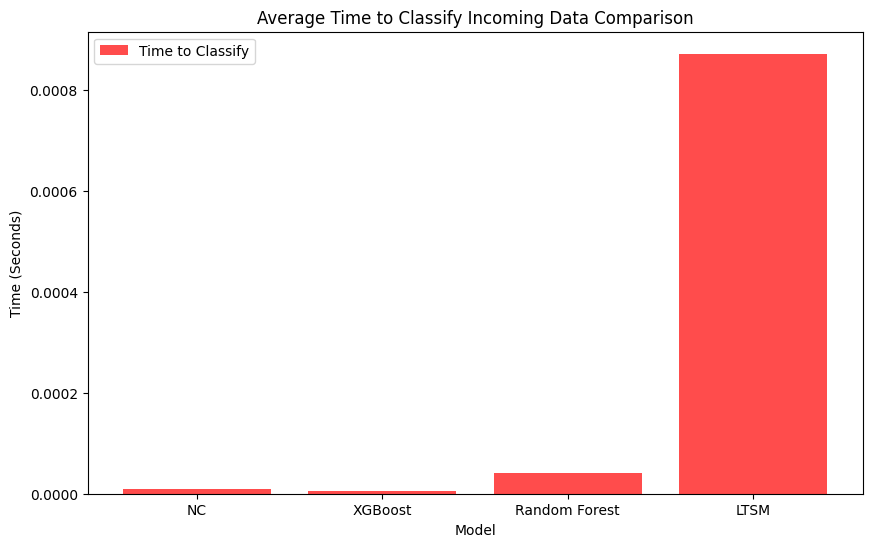

In [28]:
# models = ['KNN', 'NC', 'XGBoost', 'Random Forest', 'SVM', 'LTSM']
models = ['NC', 'XGBoost', 'Random Forest', 'LTSM']


for i in range(len(classifiers)):
    classifiers[i][0] = 0
    classifiers[i][1] = 0
data = np.array(classifiers)

plt.figure(figsize=(10, 6))
plt.bar(models, data[:,2], color='blue', alpha=0.7, label='Disk')
plt.title('Size in Disk Comparison')
plt.xlabel('Model')
plt.ylabel('Size (Bytes)')
plt.legend()
plt.show()

# plt.figure(figsize=(10, 6))
# plt.bar(models[1:6], data[1:6,2], color='blue', alpha=0.7, label='Disk')
# plt.title('Size in Disk Comparison')
# plt.xlabel('Model')
# plt.ylabel('Size (Bytes)')
# plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, data[:,3], color='red', alpha=0.7, label='Memory')
plt.title('Size in Memory Comparison')
plt.xlabel('Model')
plt.ylabel('Size (Bytes)')
plt.legend()
plt.show()

# plt.figure(figsize=(10, 6))
# plt.bar(models[1:6], data[1:6,3], color='red', alpha=0.7, label='Memory')
# plt.title('Size in Memory Comparison')
# plt.xlabel('Model')
# plt.ylabel('Size (Bytes)')
# plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, data[:,4], color='red', alpha=0.7, label='Time to Classify')
plt.title('Average Time to Classify Incoming Data Comparison')
plt.xlabel('Model')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.show()

# plt.figure(figsize=(10, 6))
# plt.bar(models[1:6], data[1:6,3], color='red', alpha=0.7, label='Time to Classify')
# plt.title('Average Time to Classify Incoming Data Comparison')
# plt.xlabel('Model')
# plt.ylabel('Time (Seconds)')
# plt.legend()
# plt.show()